In [1]:
## Import the packages, Read the data and divide data into numericala and categorical

# Import the packages
# Read the data

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

visa_df=pd.read_csv("Visadataset.csv")

cat_columns=visa_df.select_dtypes(include='object').columns
num_columns=visa_df.select_dtypes(exclude='object').columns
num_columns

Index(['no_of_employees', 'yr_of_estab', 'prevailing_wage'], dtype='object')

**Boxplot**

- Box plot is used to identify the outliers

- Outlier is an observation having huge postive value or huge negative value

- Q1 = 25p  , Q2=50p and Q3=75p

- IQR = Inter quartile range= Q3-Q1

- Q3+ 1.5* IQR  and  Q1-1.5*IQR


           Q1-1.5IQR   Q1   median  Q3   Q3+1.5IQR

                       |-----:-----|
       o      |--------|     :     |--------|    o  o
                       |-----:-----|
                       
     flier             <----------->            fliers
                            IQR

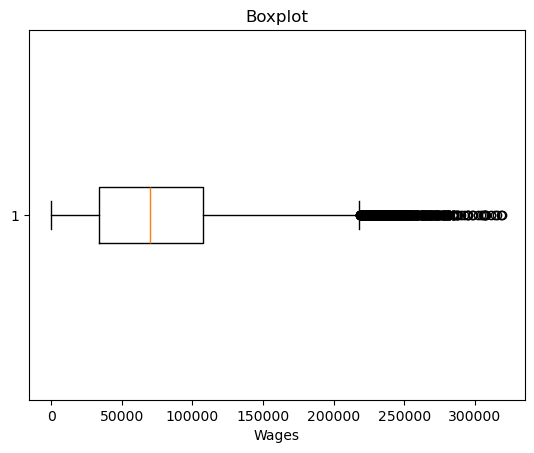

In [6]:
# Read the preavailaing wage data and plot the box plot
wage_data=visa_df['prevailing_wage']
plt.boxplot(wage_data,vert=False)
plt.title('Boxplot')
plt.xlabel('Wages')
plt.show()

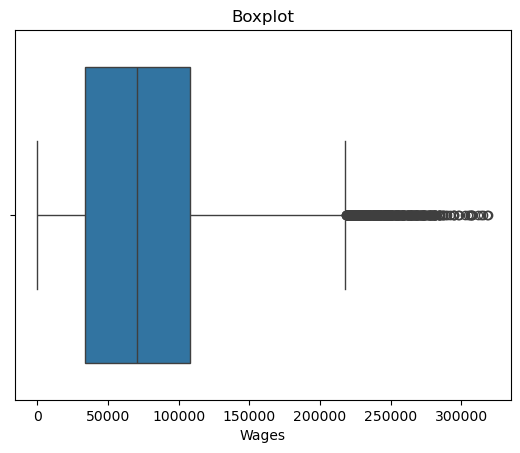

In [9]:
wage_data=visa_df['prevailing_wage']
sns.boxplot(wage_data,orient='h')
plt.title('Boxplot')
plt.xlabel('Wages')
plt.show()

**plot the histogram plot and box plot side by side** 

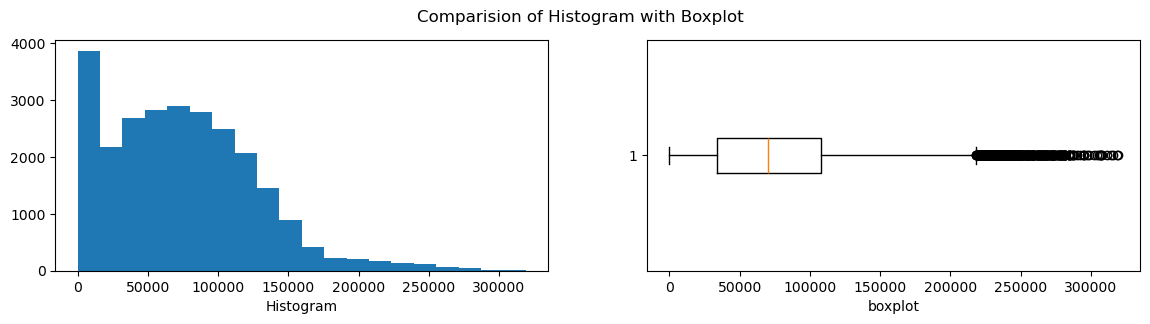

In [19]:
wage_data=visa_df['prevailing_wage']
plt.figure(figsize=(14,3))
plt.suptitle('Comparision of Histogram with Boxplot')
plt.subplot(1,2,1)
plt.hist(wage_data,bins=20)
plt.xlabel('Histogram')
plt.subplot(1,2,2)
plt.boxplot(wage_data,vert=False)
plt.xlabel('boxplot')
plt.show()

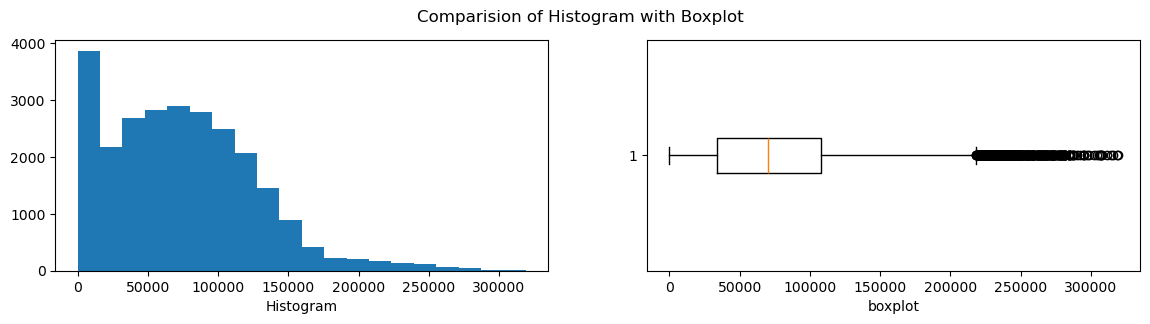

In [20]:
wage_data=visa_df['prevailing_wage']
plt.figure(figsize=(14,3))
plt.suptitle('Comparision of Histogram with Boxplot')
plt.subplot(1,2,1).hist(wage_data,bins=20)
plt.xlabel('Histogram')
plt.subplot(1,2,2).boxplot(wage_data,vert=False)
plt.xlabel('boxplot')
plt.show()

**Finding the outliers**

- We already know that outliers avialble less than Q1-1.5*IQR and Q3+1.5*IQR

- Step-1:

    - Calculate Q1 = 25p

    - Calculate Q2= 50p

    - Calculate Q3= 75p

- Step-2:

     - Calculate IQR= Q3-Q1

- Step-3:

    - Calculate LB= Q1-1.5*IQR

    - Calculate UB=Q3+1.5*IQR

- Step-4:

    - Con1= wage data <LB

    - Con2= wage data >UB

    - Con3= con1 or-and con2 (use bitwise operator)

- Step-5:  Data [con3]

In [23]:
wage_data=visa_df['prevailing_wage']
# step-1
q1=np.percentile(wage_data,25)
q2=np.percentile(wage_data,50)
q3=np.percentile(wage_data,75)
# Step-2:
IQR= q3-q1
# Step-3:
lb= q1-1.5*IQR
ub=q3+1.5*IQR
#Step-4:
con1=wage_data<lb # T F
con2=wage_data>ub # T F
con3=con1|con2 
# Bitwise operators used to compare
# Bits data === 0 and 1 == True false
#Step-3:
outliers_data=wage_data[con3]
outliers_data

14       220081.73
34       225569.73
130      247393.01
216      269321.68
221      219529.62
           ...    
25191    280482.51
25195    234308.77
25468    272715.74
25469    273772.47
25476    279174.79
Name: prevailing_wage, Length: 427, dtype: float64

In [24]:
outliers_df=visa_df[con3]
outliers_df

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
14,EZYV15,Asia,Master's,Y,Y,15756,2006,South,220081.73,Year,Y,Certified
34,EZYV35,Asia,Master's,N,N,1809,2010,South,225569.73,Year,N,Certified
130,EZYV131,South America,High School,N,N,2554,2005,Midwest,247393.01,Year,Y,Certified
216,EZYV217,Asia,Master's,Y,N,1515,2001,Midwest,269321.68,Year,N,Certified
221,EZYV222,North America,Doctorate,Y,Y,2518,2010,South,219529.62,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
25191,EZYV25192,Asia,Master's,N,N,4983,2005,Midwest,280482.51,Year,Y,Denied
25195,EZYV25196,North America,Master's,Y,N,47,2001,South,234308.77,Year,N,Certified
25468,EZYV25469,Asia,Bachelor's,N,N,373,2005,Midwest,272715.74,Year,N,Certified
25469,EZYV25470,North America,Master's,Y,N,2261,1997,Northeast,273772.47,Year,N,Certified


In [25]:
wage_data=visa_df['prevailing_wage']
# step-1
q1=np.percentile(wage_data,25)
q2=np.percentile(wage_data,50)
q3=np.percentile(wage_data,75)
# Step-2:
IQR= q3-q1
# Step-3:
lb= q1-1.5*IQR
ub=q3+1.5*IQR
#Step-4:
con1=wage_data>lb # T F
con2=wage_data<ub # T F
con3=con1&con2 
# Bitwise operators used to compare
# Bits data === 0 and 1 == True false
#Step-3:
#np.logical_and(Con1, Con2) 
non_outliers_df=visa_df[con3]
non_outliers_df

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
25474,EZYV25475,Africa,Doctorate,N,N,2594,1979,Northeast,51104.7800,Year,Y,Certified
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.5700,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.8500,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.7700,Year,Y,Certified


- we have two dataframe

- Visa_df: Total data 25480

- non_outliers_df= After removing outliers 25053

- first plot nonoutliers data prewaling wage hsitogram and boxplot

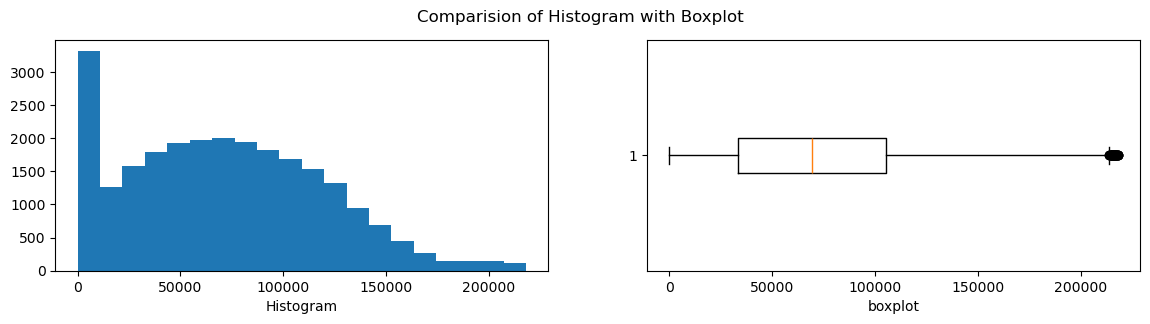

In [26]:
wage_data_non_outliers=non_outliers_df['prevailing_wage']
plt.figure(figsize=(14,3))
plt.suptitle('Comparision of Histogram with Boxplot')
plt.subplot(1,2,1).hist(wage_data_non_outliers,bins=20)
plt.xlabel('Histogram')
plt.subplot(1,2,2).boxplot(wage_data_non_outliers,vert=False)
plt.xlabel('boxplot')
plt.show()

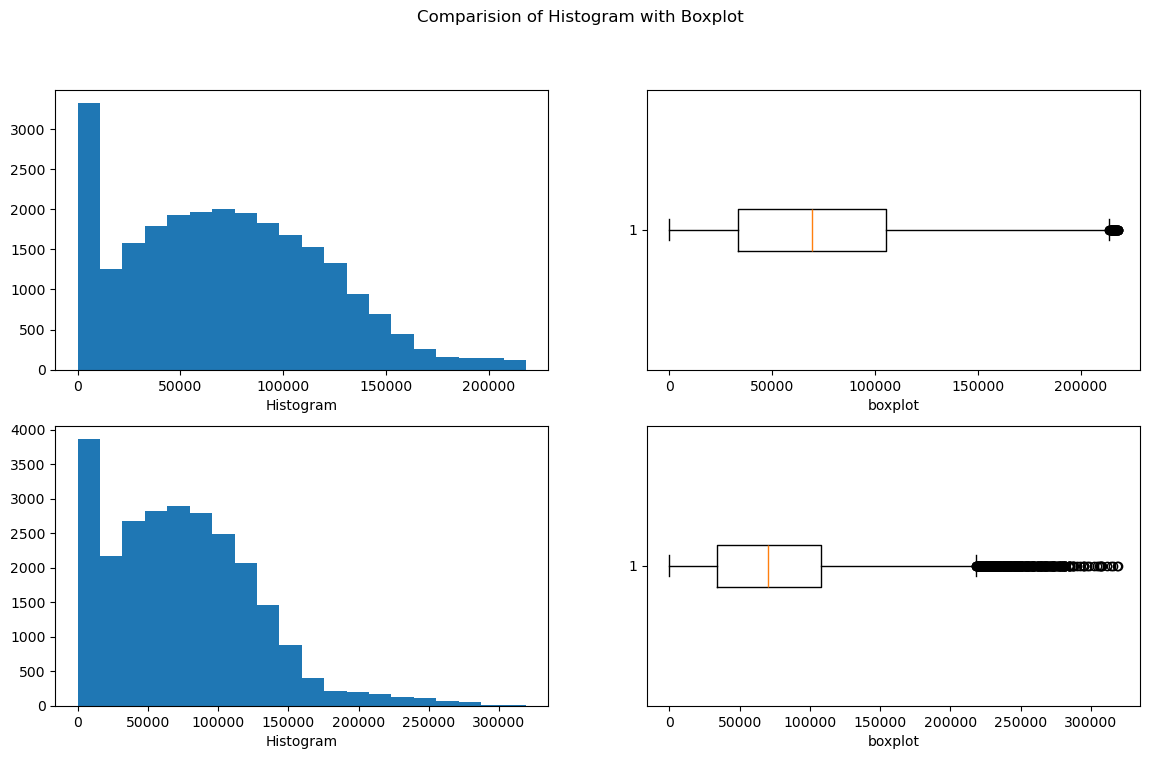

In [28]:
################### data #######################################
wage_data_non_outliers=non_outliers_df['prevailing_wage']
wage_data=visa_df['prevailing_wage']
################# Non outliers###################################### 
plt.figure(figsize=(14,8))
plt.suptitle('Comparision of Histogram with Boxplot')
plt.subplot(2,2,1).hist(wage_data_non_outliers,bins=20)
plt.xlabel('Histogram')
plt.subplot(2,2,2).boxplot(wage_data_non_outliers,vert=False)
plt.xlabel('boxplot')
###################### Entire data ################################
plt.subplot(2,2,3).hist(wage_data,bins=20)
plt.xlabel('Histogram')
plt.subplot(2,2,4).boxplot(wage_data,vert=False)
plt.xlabel('boxplot')
plt.show()

In [ ]:
# Fill the outliers of wage data with wage median
# 427 outliers 
# 427 should replace with meadin value
# again draw the plots

In [ ]:
or and

- or behaviour: 

    - suppose we take two individual conditions

    - if any one True , the final is becomes True

- and behaviour: 

    - suppose we take two individual conditions

    - both conditions should be , the final is becomes True



In [ ]:
# Some exam
# age <35 
# Degree
you can appear the exam if you have a degree or if less than 35 years old
A: age is 33 years  education:  Inter  : appear
       True                  False         True

B: age is 37 years  education: Degree
       False               True            True
C: age is 33 years  education: Degree
       True               True             True
D: age is 37 years  education: inter
       False               False            False

In [1]:
# Import the packages
# Read the data
# Categorical to Numerical
# Find the outliers
## Import the packages, Read the data and divide data into numericala and categorical

# Import the packages
# Read the data

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

visa_df=pd.read_csv("Visadataset.csv")

cat_columns=visa_df.select_dtypes(include='object').columns
num_columns=visa_df.select_dtypes(exclude='object').columns


In [2]:
wage_data=visa_df['prevailing_wage']
# step-1
q1=np.percentile(wage_data,25)
q2=np.percentile(wage_data,50)
q3=np.percentile(wage_data,75)
# Step-2:
IQR= q3-q1
# Step-3:
lb= q1-1.5*IQR
ub=q3+1.5*IQR
#Step-4:
con1=wage_data<lb # T F
con2=wage_data>ub # T F
con3=con1|con2 
# Bitwise operators used to compare
# Bits data === 0 and 1 == True false
#Step-3:
outliers_data=wage_data[con3]
outliers_data

14       220081.73
34       225569.73
130      247393.01
216      269321.68
221      219529.62
           ...    
25191    280482.51
25195    234308.77
25468    272715.74
25469    273772.47
25476    279174.79
Name: prevailing_wage, Length: 427, dtype: float64

In [3]:
wage_data=visa_df['prevailing_wage']
# step-1
q1=np.percentile(wage_data,25)
q2=np.percentile(wage_data,50)
q3=np.percentile(wage_data,75)
# Step-2:
IQR= q3-q1
# Step-3:
lb= q1-1.5*IQR
ub=q3+1.5*IQR
#Step-4:
con1=wage_data>lb # T F
con2=wage_data<ub # T F
con3=con1&con2 
# Bitwise operators used to compare
# Bits data === 0 and 1 == True false
#Step-3:
#np.logical_and(Con1, Con2) 
non_outliers_df=visa_df[con3]
non_outliers_df

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
25474,EZYV25475,Africa,Doctorate,N,N,2594,1979,Northeast,51104.7800,Year,Y,Certified
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.5700,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.8500,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.7700,Year,Y,Certified


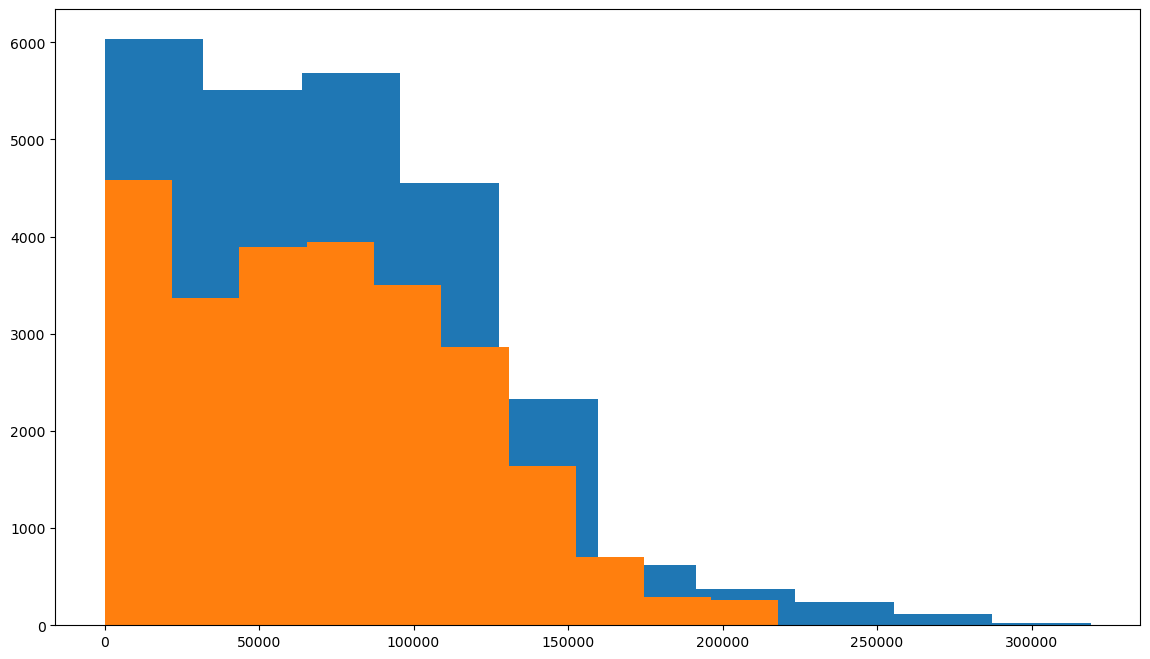

In [5]:
################### data #######################################
wage_data_non_outliers=non_outliers_df['prevailing_wage']
wage_data=visa_df['prevailing_wage']
################# Non outliers###################################### 
plt.figure(figsize=(14,8))
plt.hist(wage_data)
plt.hist(wage_data_non_outliers)
plt.show()

**How to deal outliers**

- 1. We can drop the outliers
 
     - Droping outliers is an easy task, but not recomended
    
     - If you drop the outliers we are droping the rows
    
     - which means we are droping the other column values also
    
     - May be some important information we might loose from other column values
    
     - But in industry if outliser percentage less than 2% of the total data, we can drop
    
     - The number of outliers in pwage is 427
    
     - The number of total observations are 25480
    
     - The percentage is 1.67 which is less than 2%

- 2. Fill with Median value
 
     - We already know that outliers does not affect by median
    
     - so it is the best practice to fill the outliers with median
    
- 3. Capping or Flooring
 
     - Instead of fill with median
    
     - We can fill with certian values
    
     - the outliers which are less than LB fill with LB value
    
     - the outliers which are greater than UB fill with UB value
    
- **Isolation Forest**

  - Is ML model used to find the Outliers and anamolies 


**Fill with Median Value**

**np.where**

- In numpy we have method called where

- It takes three arguments

    - 1. Condition

    - 2. Value if Condition is True

    - 3. Value if Condition is False
     
- It is applicable for only Binary means if and else

In [7]:
# list1=[]
# for value in wage_data:
#     if value < LB or value > UB:
#          medain=wage_data.meadin()
#          list1.append(median)
#     else:
#         list1.append(value)
        

In [9]:
dict1={'Sub':['DS','DE','CS'],
   'marks':[100,200,300]}
df=pd.DataFrame(dict1)
df

,Sub,marks
0,DS,100
1,DE,200
2,CS,300


In [14]:
# Qn: I want to replace marks with 1 , which are greater than 100
dict1={'Sub':['DS','DE','CS'],
   'marks':[100,200,300]}
df=pd.DataFrame(dict1)
df

l=[]
for i in df['marks']:
    if i>100:
        l.append(1)
    else:
        l.append(i)
df['marks']=l
df

,Sub,marks
0,DS,100
1,DE,1
2,CS,1


In [16]:
dict1={'Sub':['DS','DE','CS'],
   'marks':[100,200,300]}
df=pd.DataFrame(dict1)
df

,Sub,marks
0,DS,100
1,DE,200
2,CS,300


In [18]:
# np.where(<condition>,<True>,<False>)
con=df['marks']>100
l=np.where(con,1,df['marks'])
df['marks']=l
df

,Sub,marks
0,DS,100
1,DE,1
2,CS,1


In [20]:
#Implement for the outliers
wage_data=visa_df['prevailing_wage']
con1= wage_data<lb
con2= wage_data>ub
con= con1 | con2
wage_med=wage_data.median()
l=np.where(con,wage_med,wage_data)
l

array([   592.2029,  83425.65  , 122996.86  , ..., 146298.85  ,
        86154.77  ,  70876.91  ])

In [22]:
visa_df['prevailing_wage_update']=l

(array([4580., 3368., 3890., 4369., 3507., 2860., 1643.,  706.,  295.,
         262.]),
 array([2.13670000e+00, 2.18113840e+04, 4.36206314e+04, 6.54298787e+04,
        8.72391260e+04, 1.09048373e+05, 1.30857621e+05, 1.52666868e+05,
        1.74476115e+05, 1.96285363e+05, 2.18094610e+05]),
 <BarContainer object of 10 artists>)

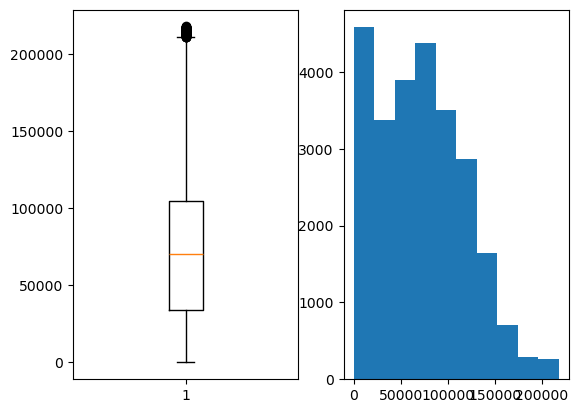

In [24]:
plt.subplot(1,2,1).boxplot(visa_df['prevailing_wage_update'])
plt.subplot(1,2,2).hist(visa_df['prevailing_wage_update'])